In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

## Problem Statement: What are the lowest and highest average medication administration by race and gender?

In [4]:
#Overview of first 5 rows of dataset
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Overview of last 5 rows of dataset
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
#To view all columns to determine which one(s) will be part of my analysis
pd.set_option('display.max_columns', None)

In [7]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [8]:
#Cleanup of data showing columns for race, gender, and number of medications
df2=df[['race','gender','num_medications']]

In [9]:
df2

,race,gender,num_medications
0,Caucasian,Female,1
1,Caucasian,Female,18
2,AfricanAmerican,Female,13
3,Caucasian,Male,16
4,Caucasian,Male,8
...,...,...,...
101761,AfricanAmerican,Male,16
101762,AfricanAmerican,Female,18
101763,Caucasian,Male,9
101764,Caucasian,Female,21


In [10]:
#Renaming columns
df3=df2.rename(columns={'race':'Race', 'gender':'Gender','num_medications':'# of Medications Administered'})

In [11]:
df3

,Race,Gender,# of Medications Administered
0,Caucasian,Female,1
1,Caucasian,Female,18
2,AfricanAmerican,Female,13
3,Caucasian,Male,16
4,Caucasian,Male,8
...,...,...,...
101761,AfricanAmerican,Male,16
101762,AfricanAmerican,Female,18
101763,Caucasian,Male,9
101764,Caucasian,Female,21


In [12]:
#Finding out what races are in the dataset
#Analysis will not include race marked with '?'. Will be removed in further cleanup of the data
df3['Race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [13]:
#Finding out what genders are in the dataset
#Analysis will only focus on female & males. 'Unknown/Invalid' will be removed in further cleanup of the data
df3['Gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [14]:
#Data excluding Race marked as '?' and excluding Gender marked as 'Unknown/Invalid'
df_FilteredData=df3[(df3['Race'].isin(['Caucasian','AfricanAmerican','Hispanic','Other','Asian']) &
                (df3['Gender'].isin(['Male','Female'])))]

In [15]:
df_FilteredData

,Race,Gender,# of Medications Administered
0,Caucasian,Female,1
1,Caucasian,Female,18
2,AfricanAmerican,Female,13
3,Caucasian,Male,16
4,Caucasian,Male,8
...,...,...,...
101761,AfricanAmerican,Male,16
101762,AfricanAmerican,Female,18
101763,Caucasian,Male,9
101764,Caucasian,Female,21


In [16]:
#Number of times each gender appears in the dataset
df_FilteredData.groupby(['Gender'])['Gender'].count().sort_values(ascending=False)

Gender
Female    53575
Male      45917
Name: Gender, dtype: int64

In [17]:
#Number of times each race appears in the dataset
df_FilteredData.groupby(['Race'])['Race'].count().sort_values(ascending=False)

Race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: Race, dtype: int64

In [18]:
#Sum of total number of medications administered by race
df_FilteredData.groupby(['Race'])['# of Medications Administered'].sum().sort_values(ascending=False)

Race
Caucasian          1239328
AfricanAmerican     295237
Hispanic             28580
Other                22848
Asian                 8520
Name: # of Medications Administered, dtype: int64

In [19]:
#Sum of total number of medications administered by gender
df_FilteredData.groupby(['Gender'])['# of Medications Administered'].sum().sort_values(ascending=False)

Gender
Female    867768
Male      726745
Name: # of Medications Administered, dtype: int64

In [20]:
#Statistics for Days Spent in Hospital Column
df_FilteredData['# of Medications Administered'].describe()

count    99492.000000
mean        16.026545
std          8.119809
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: # of Medications Administered, dtype: float64

In [21]:
#Average number of meds administered by race
df_FilteredData.groupby(['Race'])['# of Medications Administered'].mean().sort_values(ascending=False)

Race
Caucasian          16.285733
AfricanAmerican    15.368922
Other              15.181395
Hispanic           14.030437
Asian              13.291732
Name: # of Medications Administered, dtype: float64

In [22]:
#Average number of meds administered by gender
df_FilteredData.groupby(['Gender'])['# of Medications Administered'].mean().sort_values(ascending=False)

Gender
Female    16.197256
Male      15.827362
Name: # of Medications Administered, dtype: float64

In [23]:
df_MedsbyRace=df_FilteredData.groupby('Race')['# of Medications Administered'].mean()

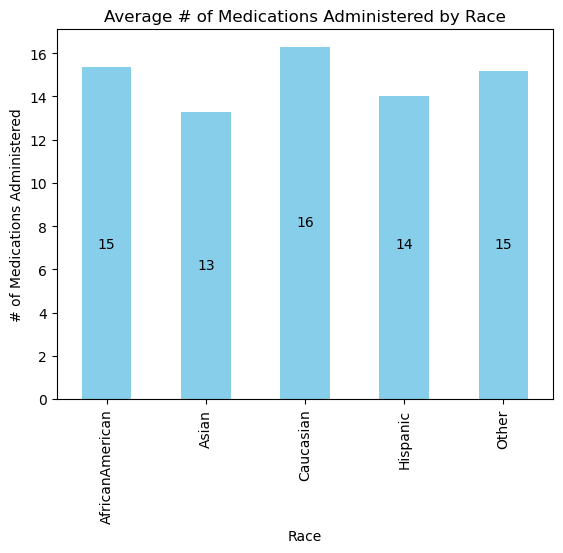

In [24]:
#Visualization of average # of meds given by race
df_MedsbyRace.plot(kind='bar',color=['skyblue'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i], ha='center')
x=['AfricanAmerican','Asian','Caucasian','Hispanic','Other']   
y=[15,13,16,14,15]

addlabels(x,y)
plt.title('Average # of Medications Administered by Race')
plt.xlabel('Race')
plt.ylabel('# of Medications Administered')
plt.show()

In [25]:
df_MedsbyGender=df_FilteredData.groupby('Gender')['# of Medications Administered'].mean()

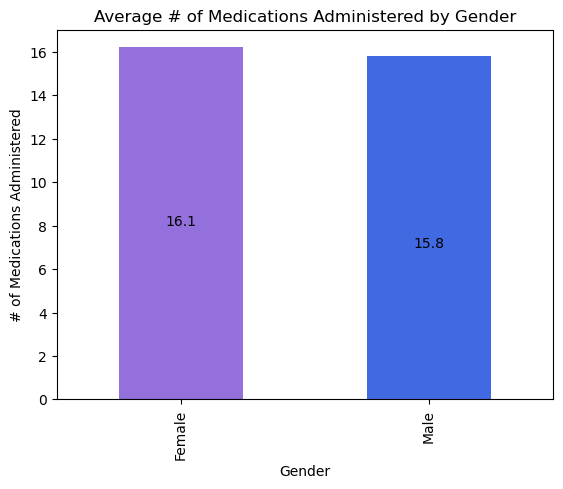

In [27]:
#Visualization of average # of meds given by gender
df_MedsbyGender.plot(kind='bar', color=['mediumpurple','royalblue'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i], ha='center')
x=['Female','Male']   
y=[16.1,15.8]

addlabels(x,y)
plt.title('Average # of Medications Administered by Gender')
plt.xlabel('Gender')
plt.ylabel('# of Medications Administered')
plt.show()

Conclusion: Those that identified as Caucasian had the highest average number of medications administered at 16 while the lowest number of medications were given to Asians with the average at 13. Those that identified as female had a higher number of medications administered compared to males.